Factor Analysis of Personality Data:  
These are 1000 user ratings for different features of personality  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("PersonalityData.xls")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   talkative     1000 non-null   int64
 1   thorough      1000 non-null   int64
 2   reserved      1000 non-null   int64
 3   careless      1000 non-null   int64
 4   relaxed       1000 non-null   int64
 5   reliable      1000 non-null   int64
 6   tense         1000 non-null   int64
 7   disorganized  1000 non-null   int64
 8   worries       1000 non-null   int64
 9   shy           1000 non-null   int64
 10  calm          1000 non-null   int64
 11  outgoing      1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


In [3]:
data.head()

,Unnamed: 0,talkative,thorough,reserved,careless,relaxed,reliable,tense,disorganized,worries,shy,calm,outgoing
0,row,4,4,4,1,3,4,2,1,3,3,2,5
1,row,2,5,2,1,4,5,4,1,4,3,3,3
2,row,3,4,5,2,2,5,5,3,4,5,4,3
3,row,3,5,4,1,3,5,3,2,2,3,5,5
4,row,5,2,2,2,4,4,3,3,3,1,5,4


In [4]:
data.drop(data.columns.tolist()[0], inplace = True, axis = 1)

In [5]:
cols = data.columns.tolist()

In [6]:
## check correlation
data.corr()

,talkative,thorough,reserved,careless,relaxed,reliable,tense,disorganized,worries,shy,calm,outgoing
talkative,1.000000,0.186023,-0.380186,-0.130651,0.065021,0.280591,-0.048666,-0.153620,-0.060252,-0.311449,0.007887,0.497777
thorough,0.186023,1.000000,-0.033741,-0.350944,0.070732,0.477091,-0.009801,-0.351918,0.082136,-0.019579,0.026153,0.083799
reserved,-0.380186,-0.033741,1.000000,0.072739,-0.139408,-0.065324,0.193299,0.002001,0.212861,0.457104,-0.110428,-0.398845
careless,-0.130651,-0.350944,0.072739,1.000000,-0.131882,-0.303986,0.135208,0.366904,0.036327,0.104819,-0.085645,-0.085179
relaxed,0.065021,0.070732,-0.139408,-0.131882,1.000000,0.085967,-0.428226,-0.129441,-0.325250,-0.136192,0.434498,0.158375
reliable,0.280591,0.477091,-0.065324,-0.303986,0.085967,1.000000,-0.060370,-0.345467,0.110279,-0.073455,0.083831,0.116539
tense,-0.048666,-0.009801,0.193299,0.135208,-0.428226,-0.060370,1.000000,0.096840,0.406315,0.158944,-0.366110,-0.150304
disorganized,-0.153620,-0.351918,0.002001,0.366904,-0.129441,-0.345467,0.096840,1.000000,-0.011939,0.004620,-0.057438,-0.075729
worries,-0.060252,0.082136,0.212861,0.036327,-0.325250,0.110279,0.406315,-0.011939,1.000000,0.119657,-0.344254,-0.163326
shy,-0.311449,-0.019579,0.457104,0.104819,-0.136192,-0.073455,0.158944,0.004620,0.119657,1.000000,-0.151517,-0.319163


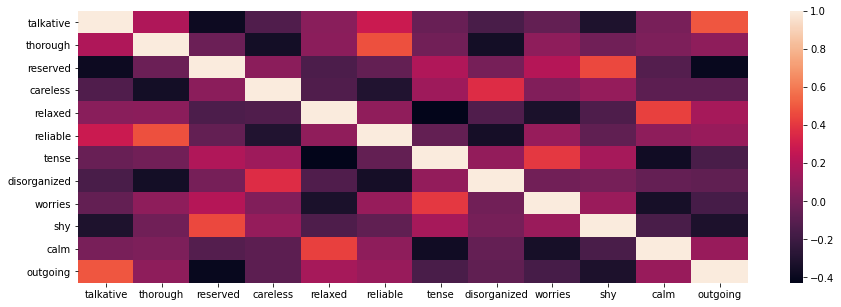

In [7]:
plt.figure(figsize = (15,5))
sns.heatmap(data.corr())

We do see the high correlations between 'reliable' and 'thorough' , 'shy' and 'reserved' etc.  

In [8]:
## scale the values and find out the principal components . 
import scipy.linalg as la
from  sklearn.preprocessing import StandardScaler

In [9]:
## Eigen values from the correlation data 
results = la.eig(data.corr())

In [10]:
## Eigen values that are > 1 are important
print([i for i in results[0] if i > 1])

[(2.8919112686815565+0j), (2.024091560104602+0j), (1.6571664622621423+0j)]


In [20]:
sum(results[0][:3])/12

(0.5477641075873584+0j)

Its seen that the first 3 eigen values cover 54% of the variation in the data.  

/Users/anushabanninthaya/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Scree plot')

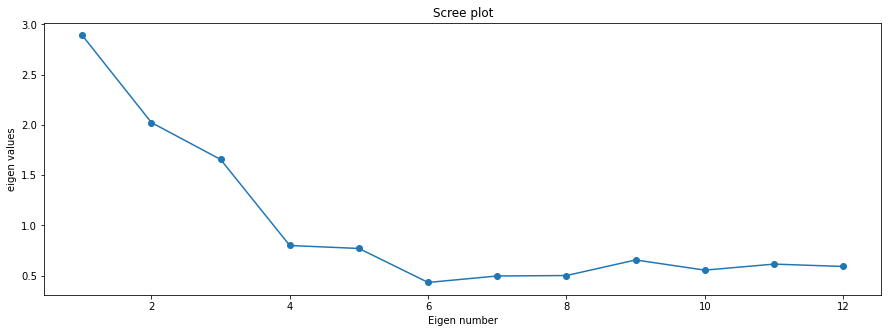

In [22]:
plt.figure(figsize = (15,5))
vectors = list(range(1,13))
plt.plot(vectors, results[0], '-o')
plt.ylabel("eigen values")
plt.xlabel("Eigen number")
plt.title("Scree plot")

As per the scree plot, 4 factors seem appropriate .  

In [11]:
## Principal Component Analysis 
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
## scale the values 
scaler = StandardScaler()
scaled = scaler.fit_transform(data.values)
pca.fit(scaled)
print("Variance explained : {}".format(pca.explained_variance_))

Variance explained : [2.89480607 2.02611768 1.65882529 0.80180459 0.77226273 0.65775658
 0.61640321 0.5929874  0.55644905 0.50265901]


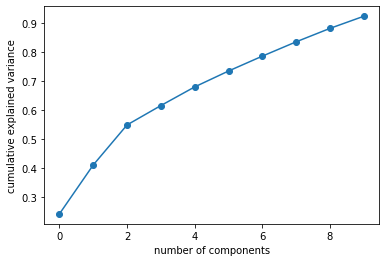

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_) , '-o')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [15]:
from sklearn.decomposition import FactorAnalysis


In [12]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [13]:
## check for  factor analysis test , p-value should be 0 (statistically sig.)
# indicating that the observed correlation matrix is not an identity matrix.
chi_square_value,p_value=calculate_bartlett_sphericity(scaled)
print(chi_square_value, p_value)

2433.318450945455 0.0


In [33]:
#KMO
#Value should be 0.6<
kmo_all,kmo_model=calculate_kmo(scaled)
print(kmo_model)

0.7543013807821201


In [34]:
#EXPLORATORY FACTOR ANALYSIS
fa = FactorAnalyzer(4, rotation=None) ## 4 Factors 
fa.fit(scaled)

FactorAnalyzer(n_factors=4, rotation=None, rotation_kwargs={})

In [35]:
#GET EIGENVALUES
print(fa.get_eigenvalues())
ev = fa.get_eigenvalues()[0]

(array([2.89191127, 2.02409156, 1.65716646, 0.80100278, 0.77149046,
       0.65709883, 0.61578681, 0.59239441, 0.5558926 , 0.50215635,
       0.49762287, 0.4333856 ]), array([ 2.39223863,  1.44867311,  1.18932663,  0.39587871,  0.14752999,
        0.06842179,  0.02383651,  0.00894101, -0.0126009 , -0.02896151,
       -0.09216206, -0.11500454]))


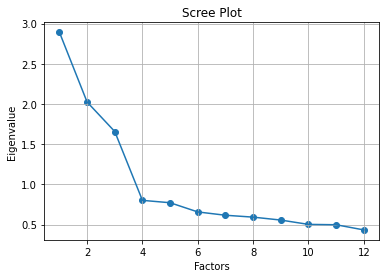

In [36]:
# SCREEPLOT (need pyplot)
plt.scatter(range(1,scaled.shape[1]+1),ev)
plt.plot(range(1,scaled.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [18]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(3, rotation="varimax", method='minres', use_smc=True)
fa.fit(scaled)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [19]:
loadings = pd.DataFrame(fa.loadings_, columns=['Factor_1', 'Factor_2', 'Factor_3'], index= data.columns)
print('Factor Loadings \n%s' %loadings)

Factor Loadings 
              Factor_1  Factor_2  Factor_3
talkative     0.661461  0.056140  0.249090
thorough      0.051161  0.041487  0.672584
reserved     -0.653848  0.169057  0.019260
careless     -0.065606  0.125225 -0.514392
relaxed       0.081618 -0.634712  0.137340
reliable      0.131194  0.021868  0.654488
tense        -0.115643  0.646043 -0.068487
disorganized -0.009715  0.077583 -0.566840
worries      -0.153527  0.567183  0.118925
shy          -0.535714  0.154023 -0.010103
calm          0.052132 -0.601360  0.069694
outgoing      0.631171 -0.119647  0.087707


In [20]:
## Which variables have high loadings ??
loadings[loadings > 0.4]

,Factor_1,Factor_2,Factor_3
talkative,0.661461,NaN,NaN
thorough,NaN,NaN,0.672584
reserved,NaN,NaN,NaN
careless,NaN,NaN,NaN
relaxed,NaN,NaN,NaN
reliable,NaN,NaN,0.654488
tense,NaN,0.646043,NaN
disorganized,NaN,NaN,NaN
worries,NaN,0.567183,NaN
shy,NaN,NaN,NaN


Factor 1 stands for talkative/outgoing.  
Factor 2 stands for tense, worries.  
Factor 3 stands for thorough, reliable.  

In [21]:
## Factor Score for each user 
scores = fa.transform(scaled)

In [22]:
data_scores = pd.DataFrame(scores, columns=['Factor_1', 'Factor_2', 'Factor_3'])

In [23]:
data_scores.shape

(1000, 3)

In [27]:
data_scores.columns = ['Extrovert', 'Anxious', 'Trustworthy']

In [28]:
data_scores.head()

,Extrovert,Anxious,Trustworthy
0,0.106773,-0.235488,0.608101
1,-0.523816,-0.127487,1.218327
2,-1.229871,0.650957,0.452784
3,-0.238287,-0.880660,1.063353
4,1.087582,-0.940862,-0.803197
